In [3]:
import os 
import pandas as pd
import numpy as np
import sys

# Add the root directory of your project to the Python path
sys.path.append('/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction')

from boston_housing_prediction.ingest_data import DataIngestorFactory

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis, CategoricalVsCategoricalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [7]:
# Ingest and load data
# Assuming you have not extracted the data into the 'extracted-data' folder

file_path = os.path.join('..', 'data', 'archive.zip')
file_extension = os.path.splitext(file_path)[1]

data_ingestor = DataIngestorFactory.get_data_ingestor(file_extension)

df = data_ingestor.ingest(file_path)

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Basic Data Inspection

In [8]:
# Initialize the Data Inspector with a strategy for Data Types Inspection
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [9]:
# Switch to Summary Statistics Strategy
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534 

ValueError: No objects to concatenate

### Insights:
- The data includes 506 entries
- MEDV is the target variable
- All features appear to be numeric
- the maximum MEDV is 50
- the average MEDV is 22.533
- furthur analysis on individual features in needed.

## Missing Values Detection


Missing Values Count by Column:
Series([], dtype: int64)

Visualizing Missing Values...


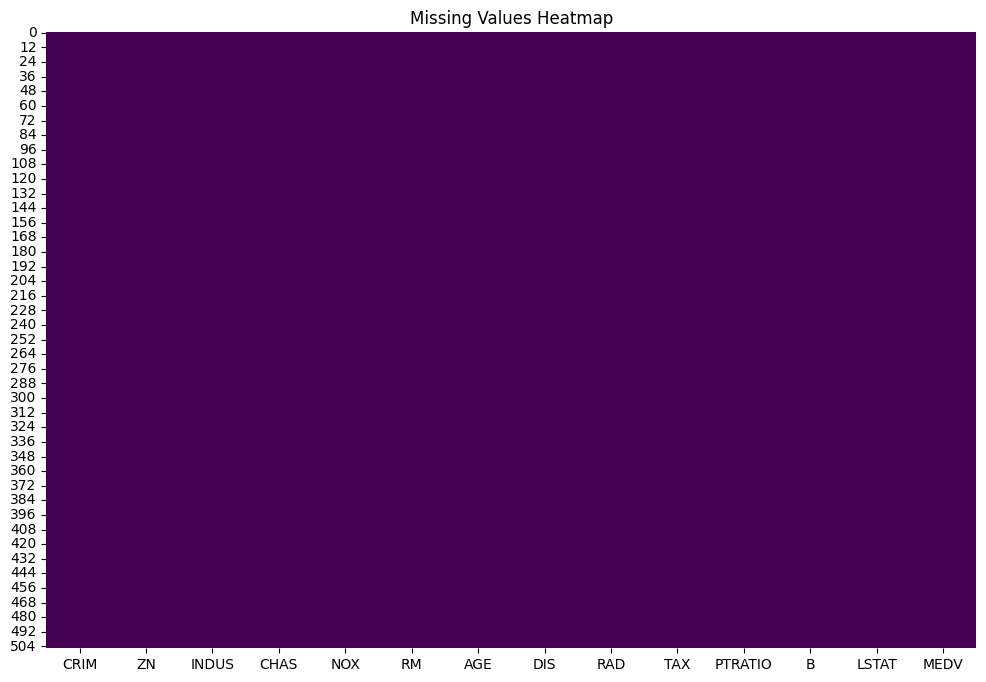

In [10]:
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

### Insights:
- No missing values detected in the dataset.

## Univariate Analysis

### CRIM

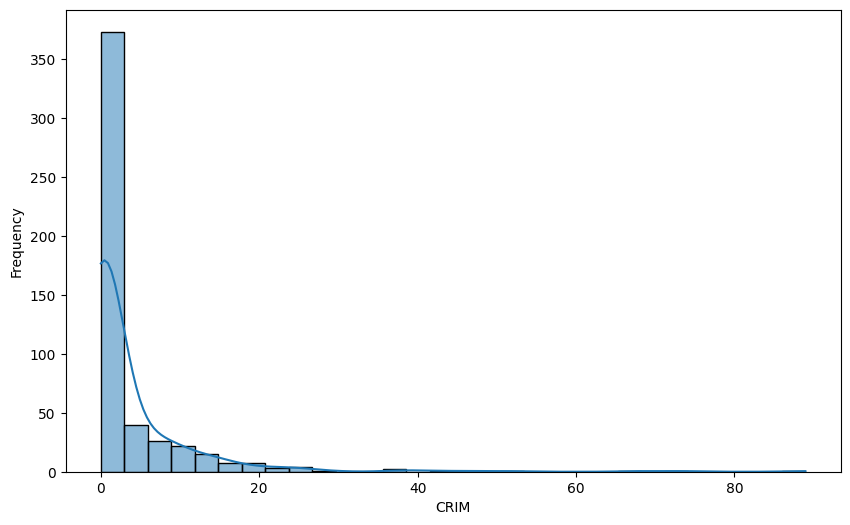

In [11]:
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "CRIM")

### Insights:
- CRIM (per capita crime rate by town) is highly skewed.
- Most towns have a CRIM of lower than 20.
- Majority of towns have a low CRIM value.

### ZN

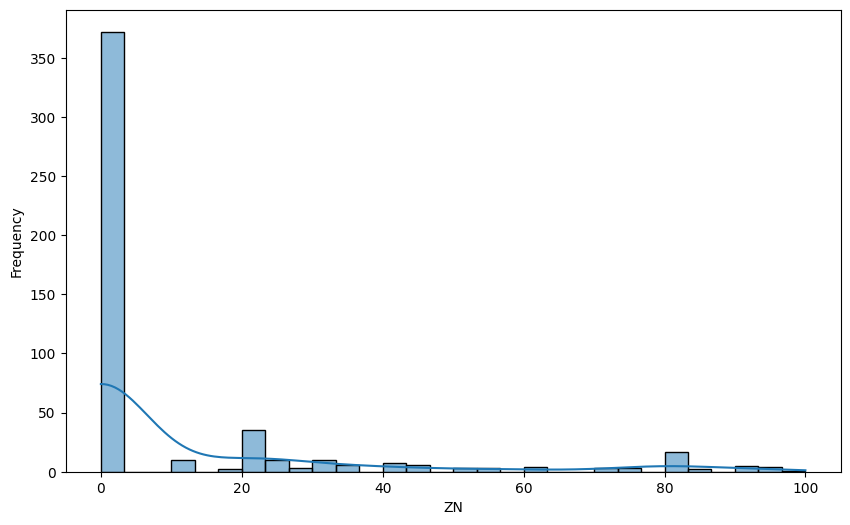

In [12]:
univariate_analyzer.execute_analysis(df, "ZN")

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


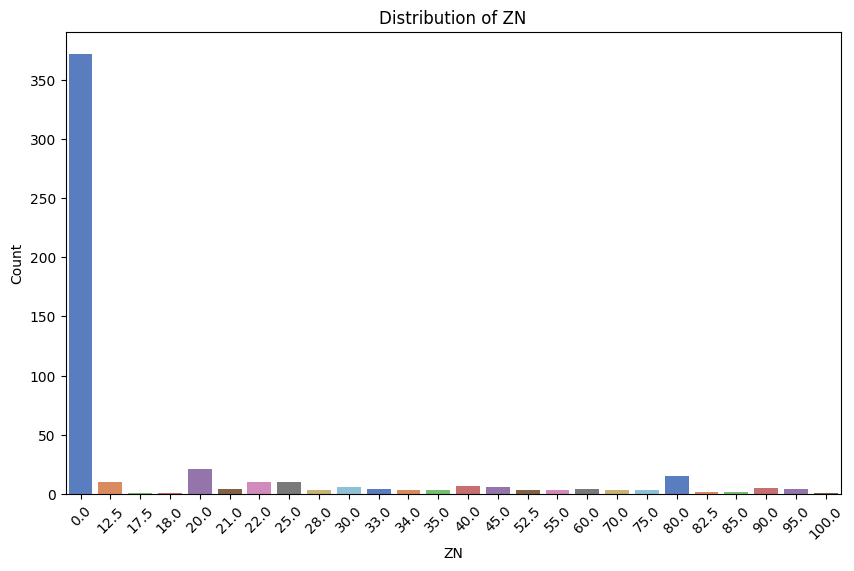

In [13]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "ZN")

### Insights:
- ZN (proportion of residential land zoned for lots over 25,000 sq. ft.) distribution seems highly skewed.
- The values of ZN are discrete and maybe considered as conditional.

### INDUS

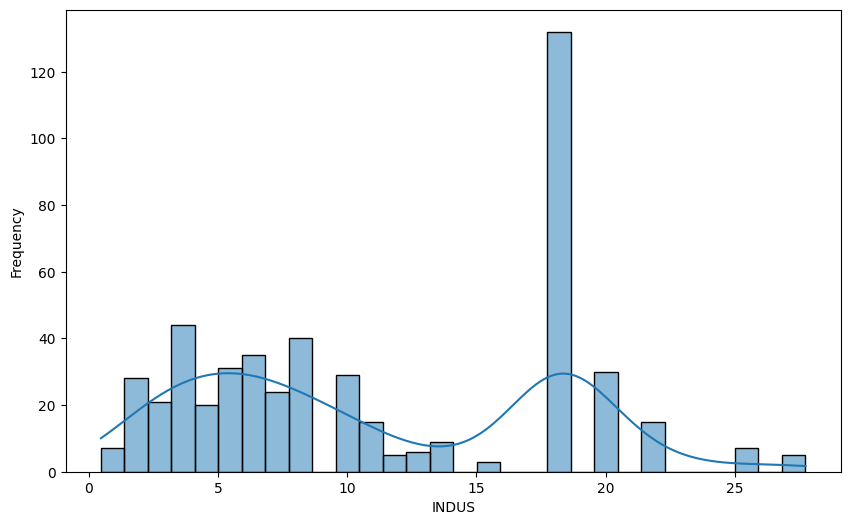

In [14]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "INDUS")

### Insights:
- INDUS (proportion of non-retail business acres per town) have an uneven distribution with over 120 towns with around 18 or 19 INDUS.

### CHAS

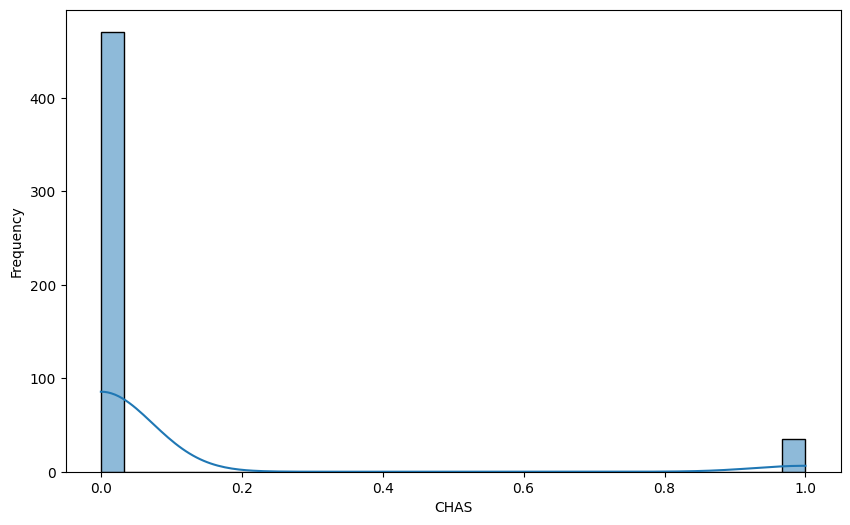

In [15]:
univariate_analyzer.execute_analysis(df, "CHAS")

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


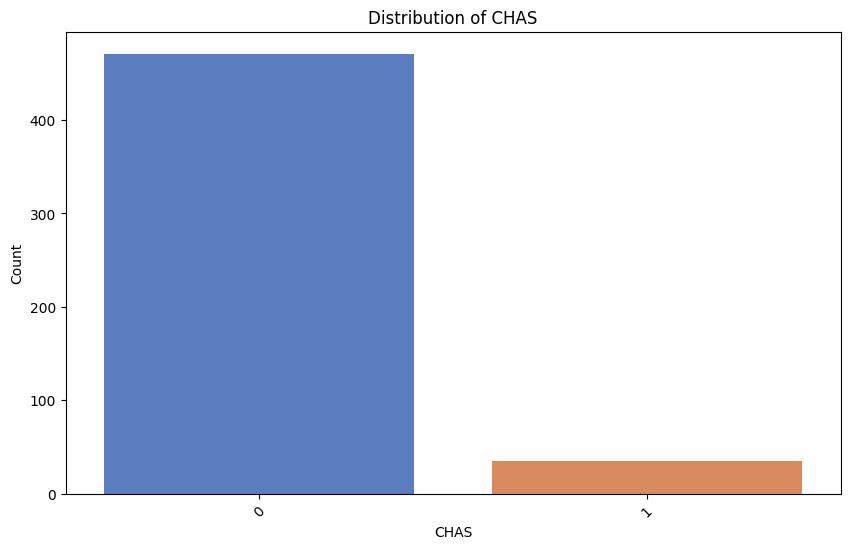

In [16]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "CHAS")

### Insights:
- Heavy imbalance for CHAS (Charles River dummy variable (1 if tract bounds river; 0 otherwise))
- This suggest majority towns do not have their tracts bound the Charles River.
- CHAS can be considered as a Categorical Feature.

### NOX

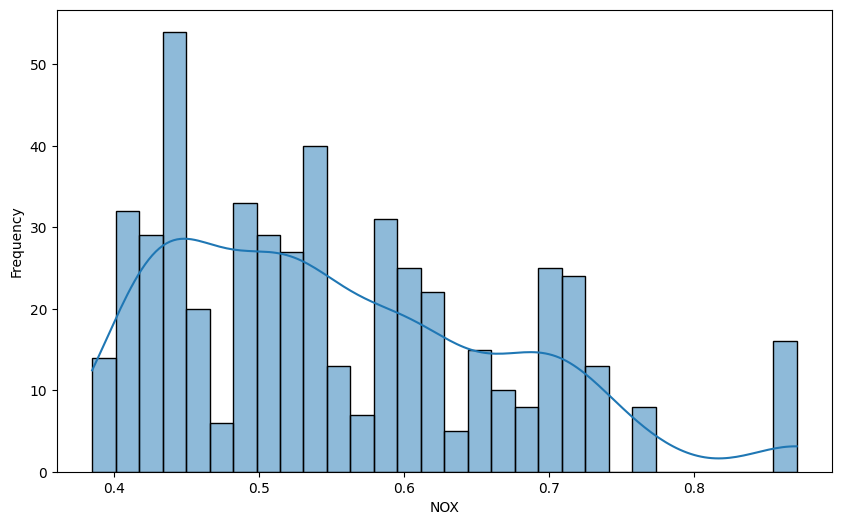

In [17]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "NOX")

### Insights:
- NOX (nitric oxide concentration in ppm) is very slightly skewed but is fairly normally distributed.
- Over 15 towns have NOX greater than 0.8 ppm.

### RM

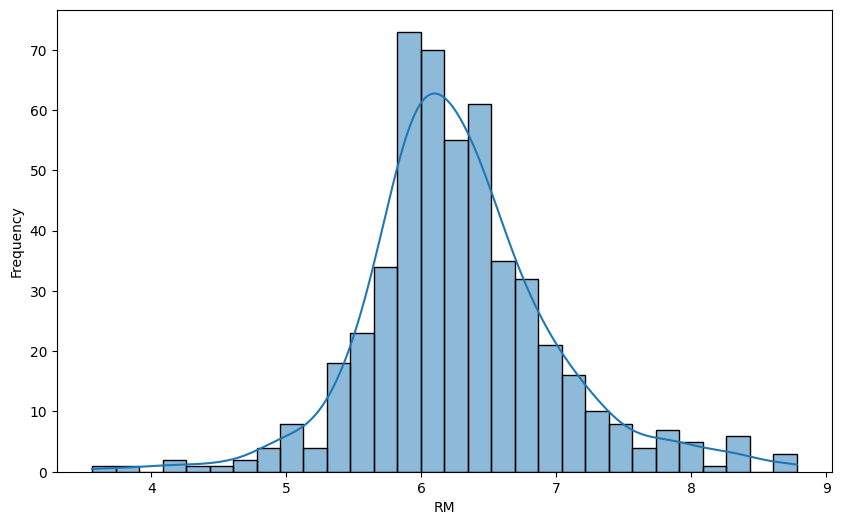

In [18]:
univariate_analyzer.execute_analysis(df, "RM")

### Insights:
- RM (average no of rooms per dwelling) is normally distributed with most frequent RM of around 6.

### AGE

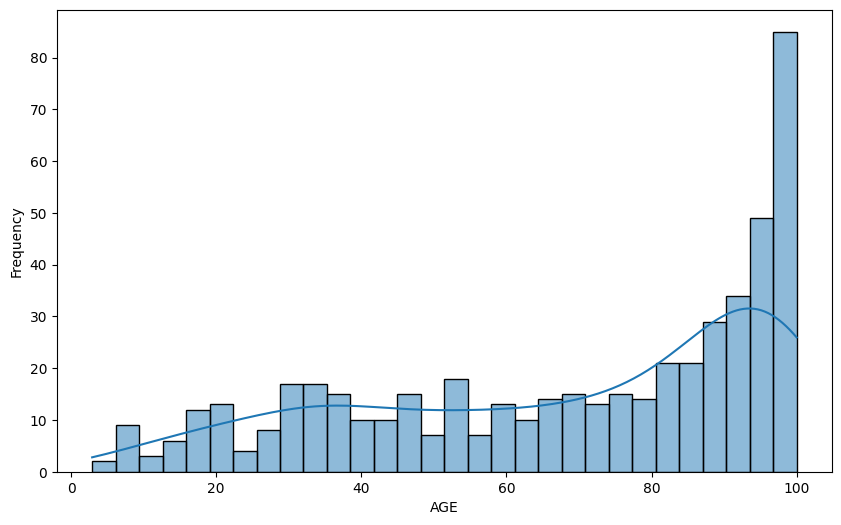

In [19]:
univariate_analyzer.execute_analysis(df, "AGE")

### Insights:
- AGE (proportion of owner-occupied units built prior to 1940) is highly skewed.
- Indicating that most of the houses are older than 1940.

### DIS

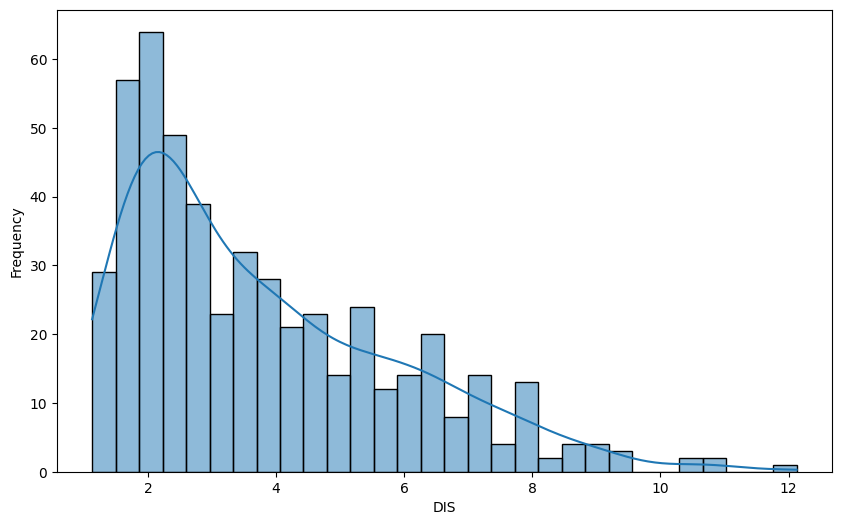

In [20]:
univariate_analyzer.execute_analysis(df, "DIS")

### Insights:
- DIS (weighted distances to five Boston employment centres) is skewed to the left.
- Most common DIS is around 2.

### RAD

/Users/atharv/MLProjects/BostonHousingPrediction/boston-housing-prediction/analysis/analyze_src/univariate_analysis.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


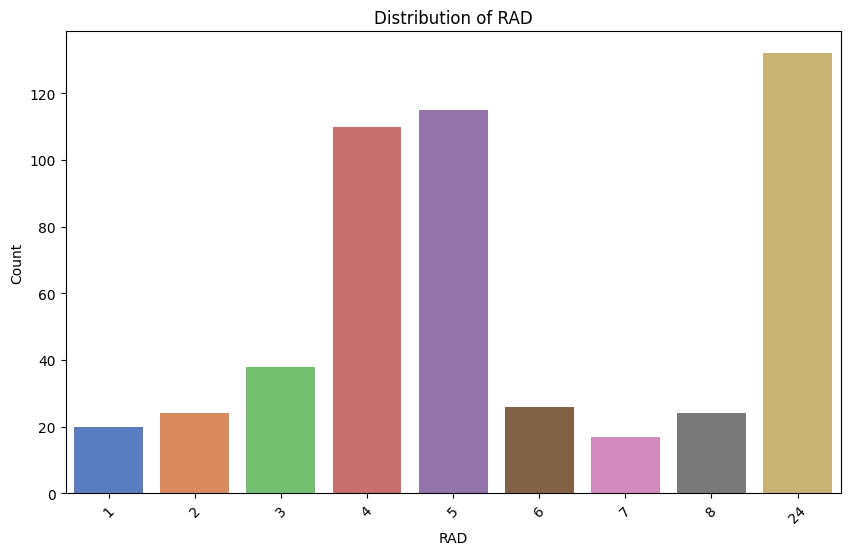

In [21]:
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "RAD")

### Insights:
- RAD (index of accessibility to radial highways) have discrete values and can be considered as categorical.

### TAX

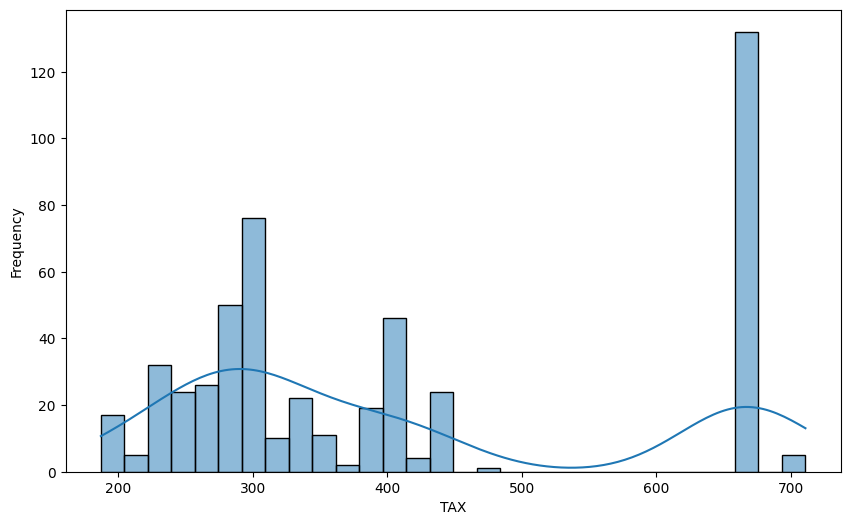

In [22]:
univariate_analyzer.set_strategy(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "TAX")

### Insights:
- TAX (full-value property-tax rate per $10,000) is skewed to the right.

### PTRATIO

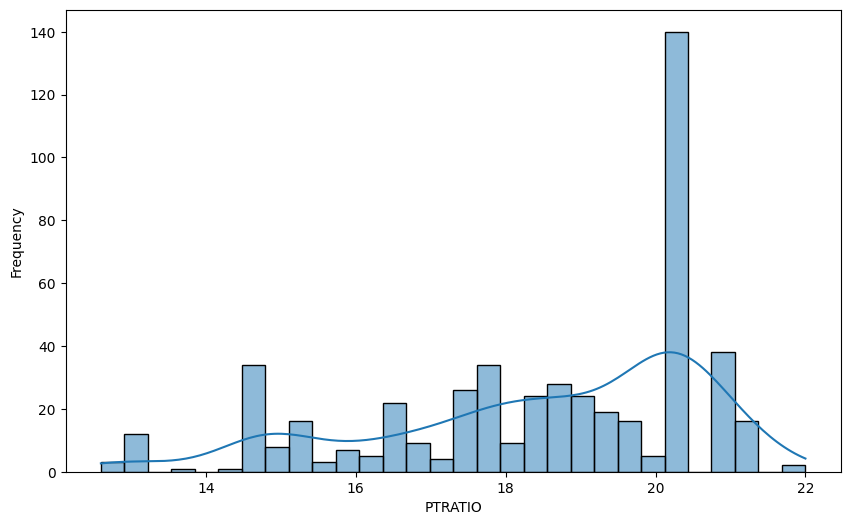

In [23]:
univariate_analyzer.execute_analysis(df, "PTRATIO")

### Insights:
- PTRATIO (pupil-teacher ratio by town) is skewed to the right.
- This feature is not very important for housing prices

### B

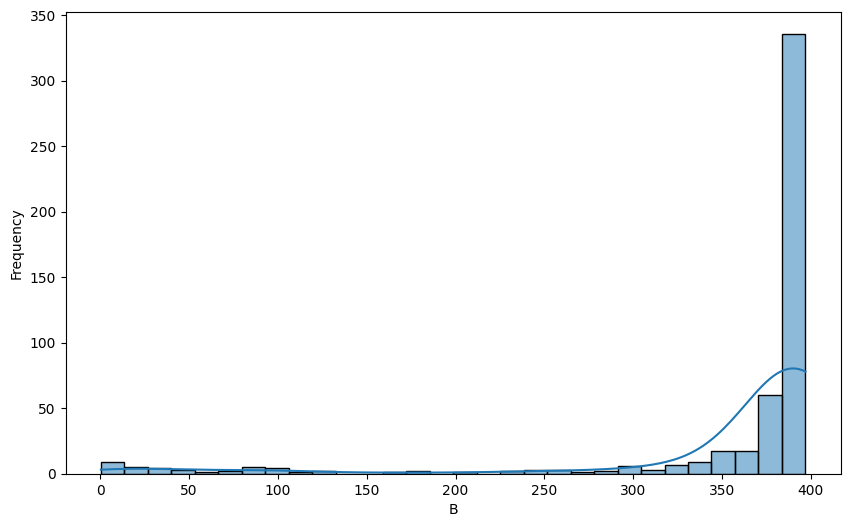

In [24]:
univariate_analyzer.execute_analysis(df, "B")

### Insights:
- B ( B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town) is skewed to the right.
- There is imbalance of Blacks proportion in the dataset.

### LSTAT

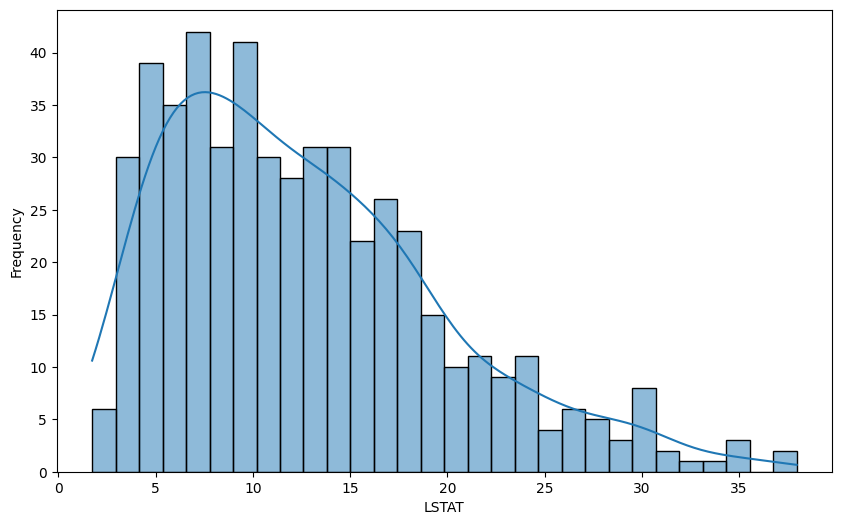

In [25]:
univariate_analyzer.execute_analysis(df, "LSTAT")

### Insights:
- LSTAT (% lower status of the population) is skewed to the left.
- There are more lower status population than higher which is logical.

### MEDV

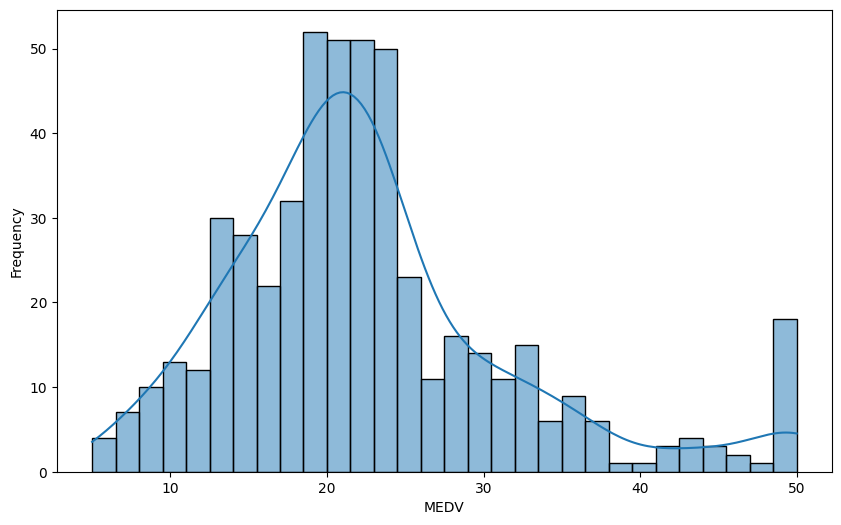

In [26]:
univariate_analyzer.execute_analysis(df, "MEDV")

### Insights:
- MEDV (Median value of owner-occupied homes in $1000's [k$]) is normally distributed.
- Its the target variable.

## Bivariate Analysis